In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set(style='whitegrid', context='notebook', palette='deep')

In [4]:
# Load the training data
train_data = pd.read_csv('../data/train.csv')

# Preview the first few rows
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Get basic information about the dataset
train_data.info()

# Get statistical summaries
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


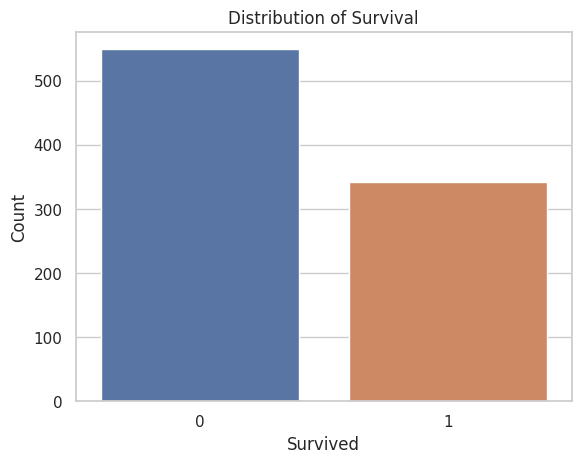

In [6]:
# Countplot of Survived
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


In [7]:
# List of numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']


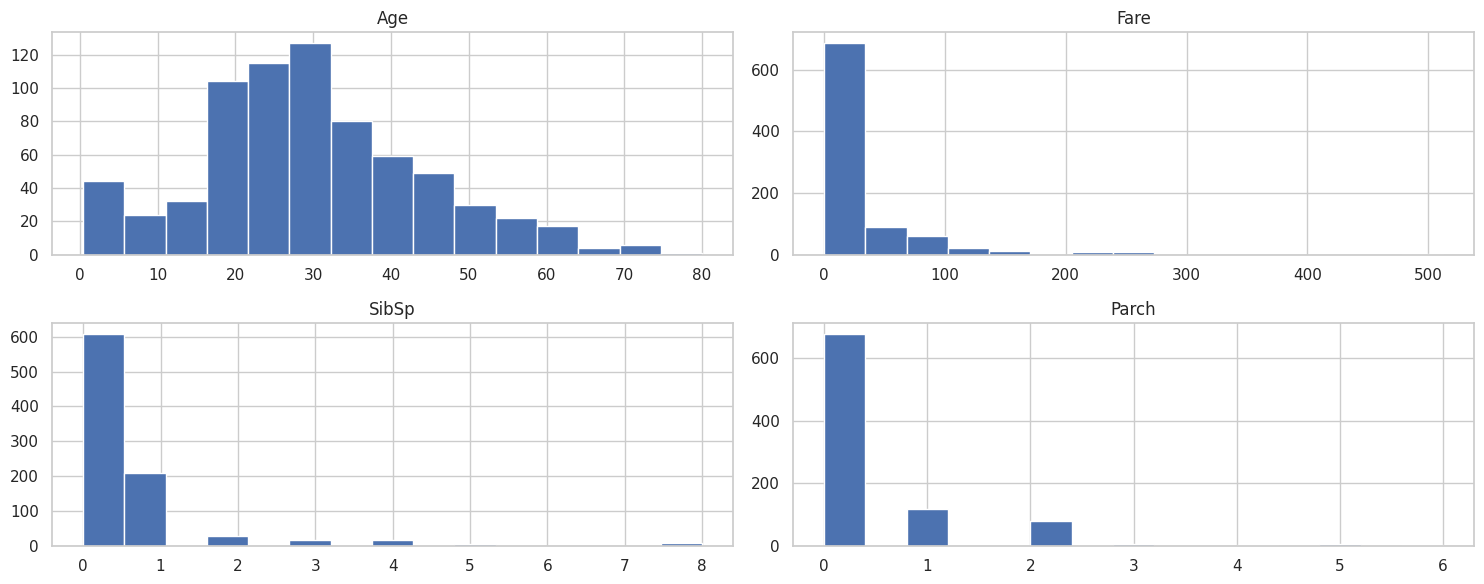

In [8]:
# Histograms for numerical features
train_data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.tight_layout()
plt.show()

In [9]:
# List of categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked']

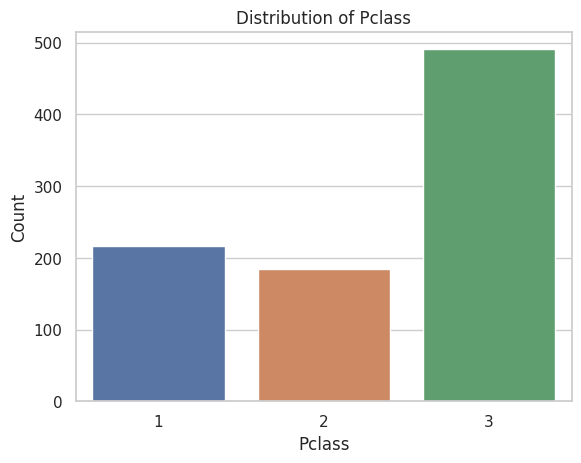

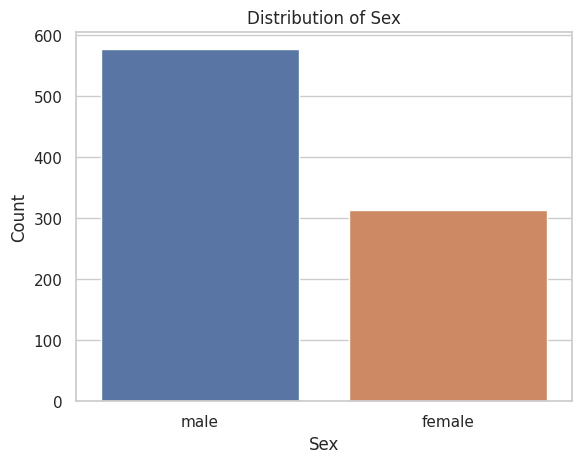

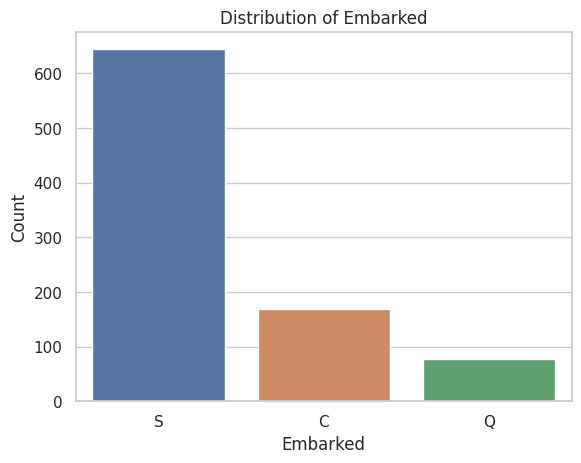

In [10]:
# Countplots for categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

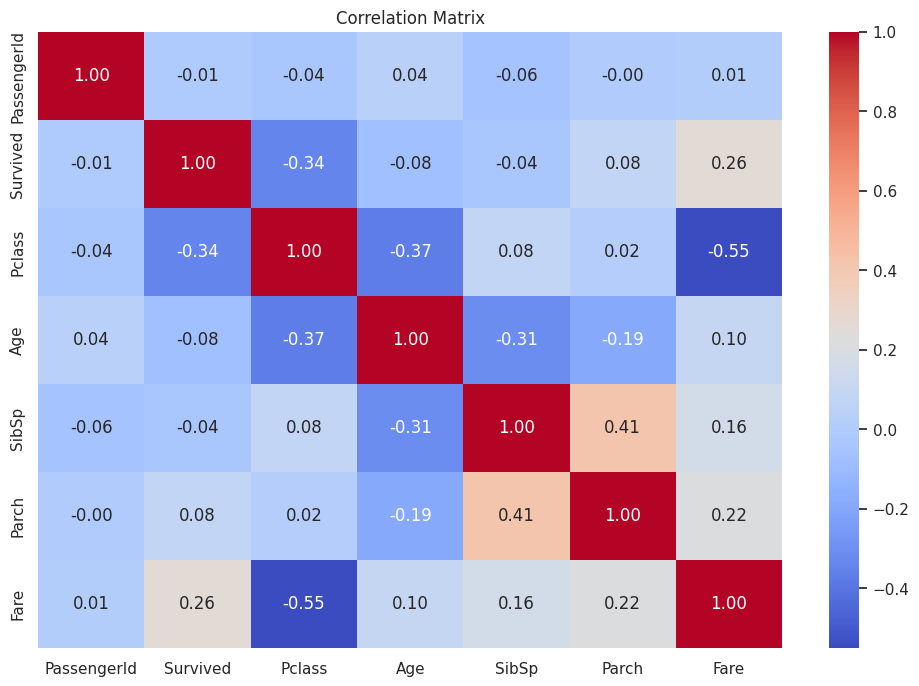

In [13]:
# Automatically select columns with numeric data types
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = train_data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

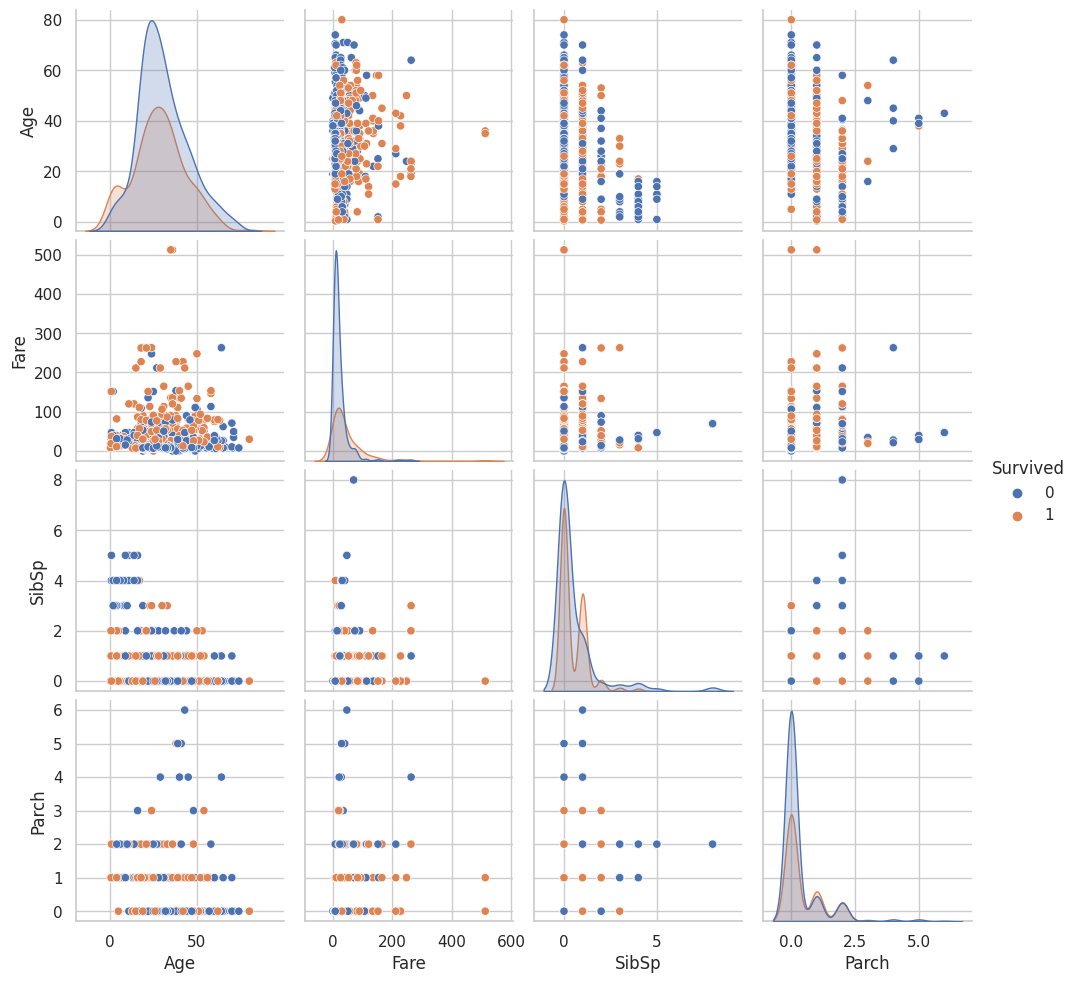

In [14]:
# Pairplot
sns.pairplot(train_data[numerical_features + ['Survived']], hue='Survived', diag_kind='kde')
plt.show()

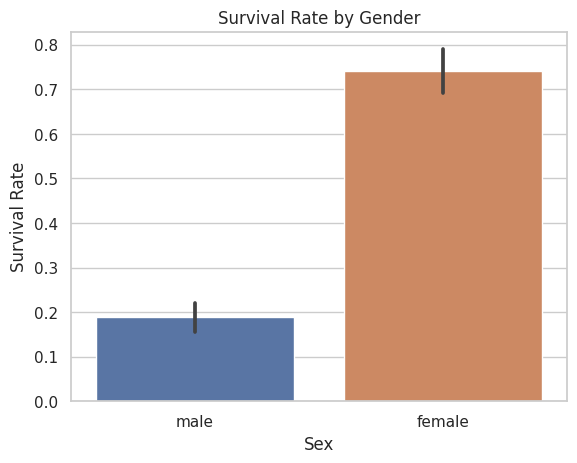

In [15]:
# Bar plot of Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

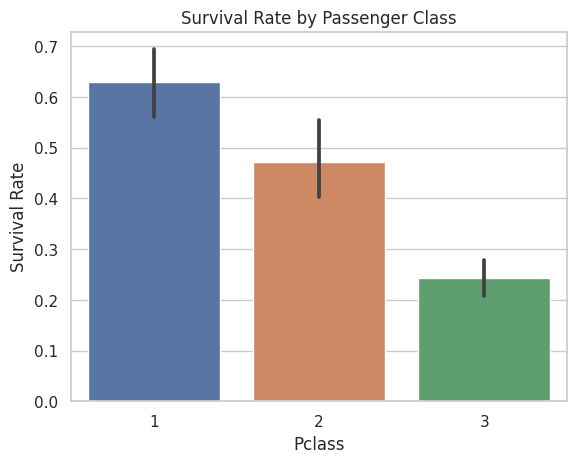

In [16]:
# Bar plot of Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

/tmp/ipykernel_16896/1963470840.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Age'][train_data['Survived'] == 1], shade=True, label='Survived', color='blue')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_16896/1963470840.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Age'][train_data['Survived'] == 0], shade=True, label='Not Survived', color='red')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remove

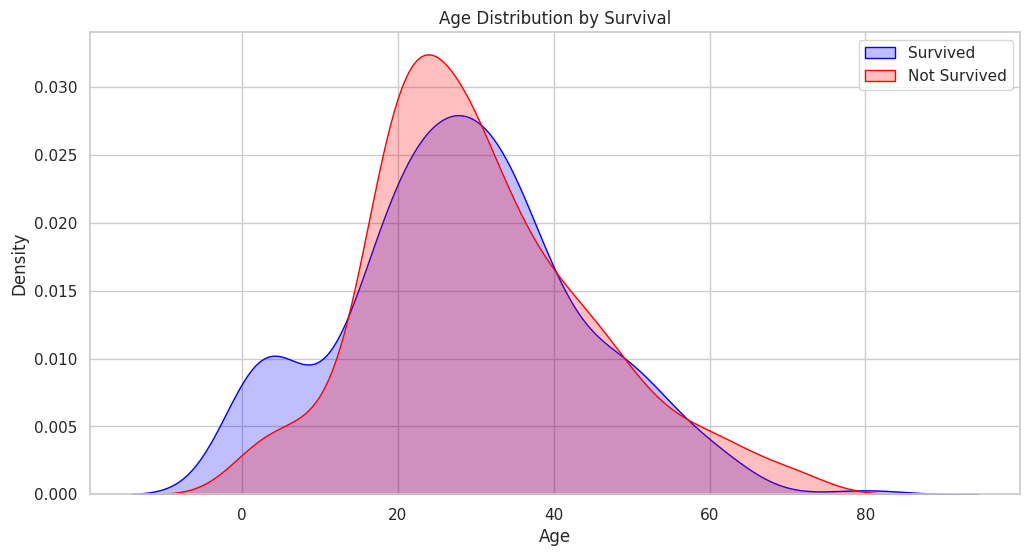

In [17]:
# Plot Age distribution for Survived and Not Survived
plt.figure(figsize=(12, 6))
sns.kdeplot(train_data['Age'][train_data['Survived'] == 1], shade=True, label='Survived', color='blue')
sns.kdeplot(train_data['Age'][train_data['Survived'] == 0], shade=True, label='Not Survived', color='red')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

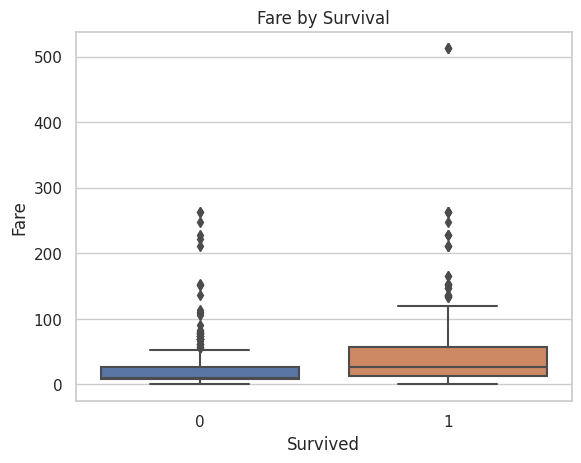

In [18]:
# Boxplot of Fare by Survival
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

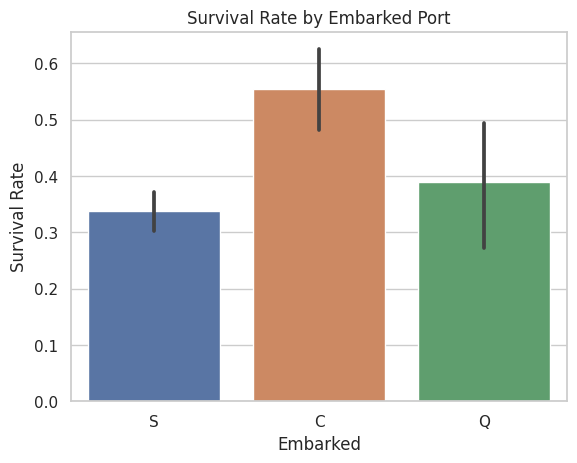

In [19]:
# Bar plot of Survival Rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

In [20]:
# Calculate total missing values per column
missing_values = train_data.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


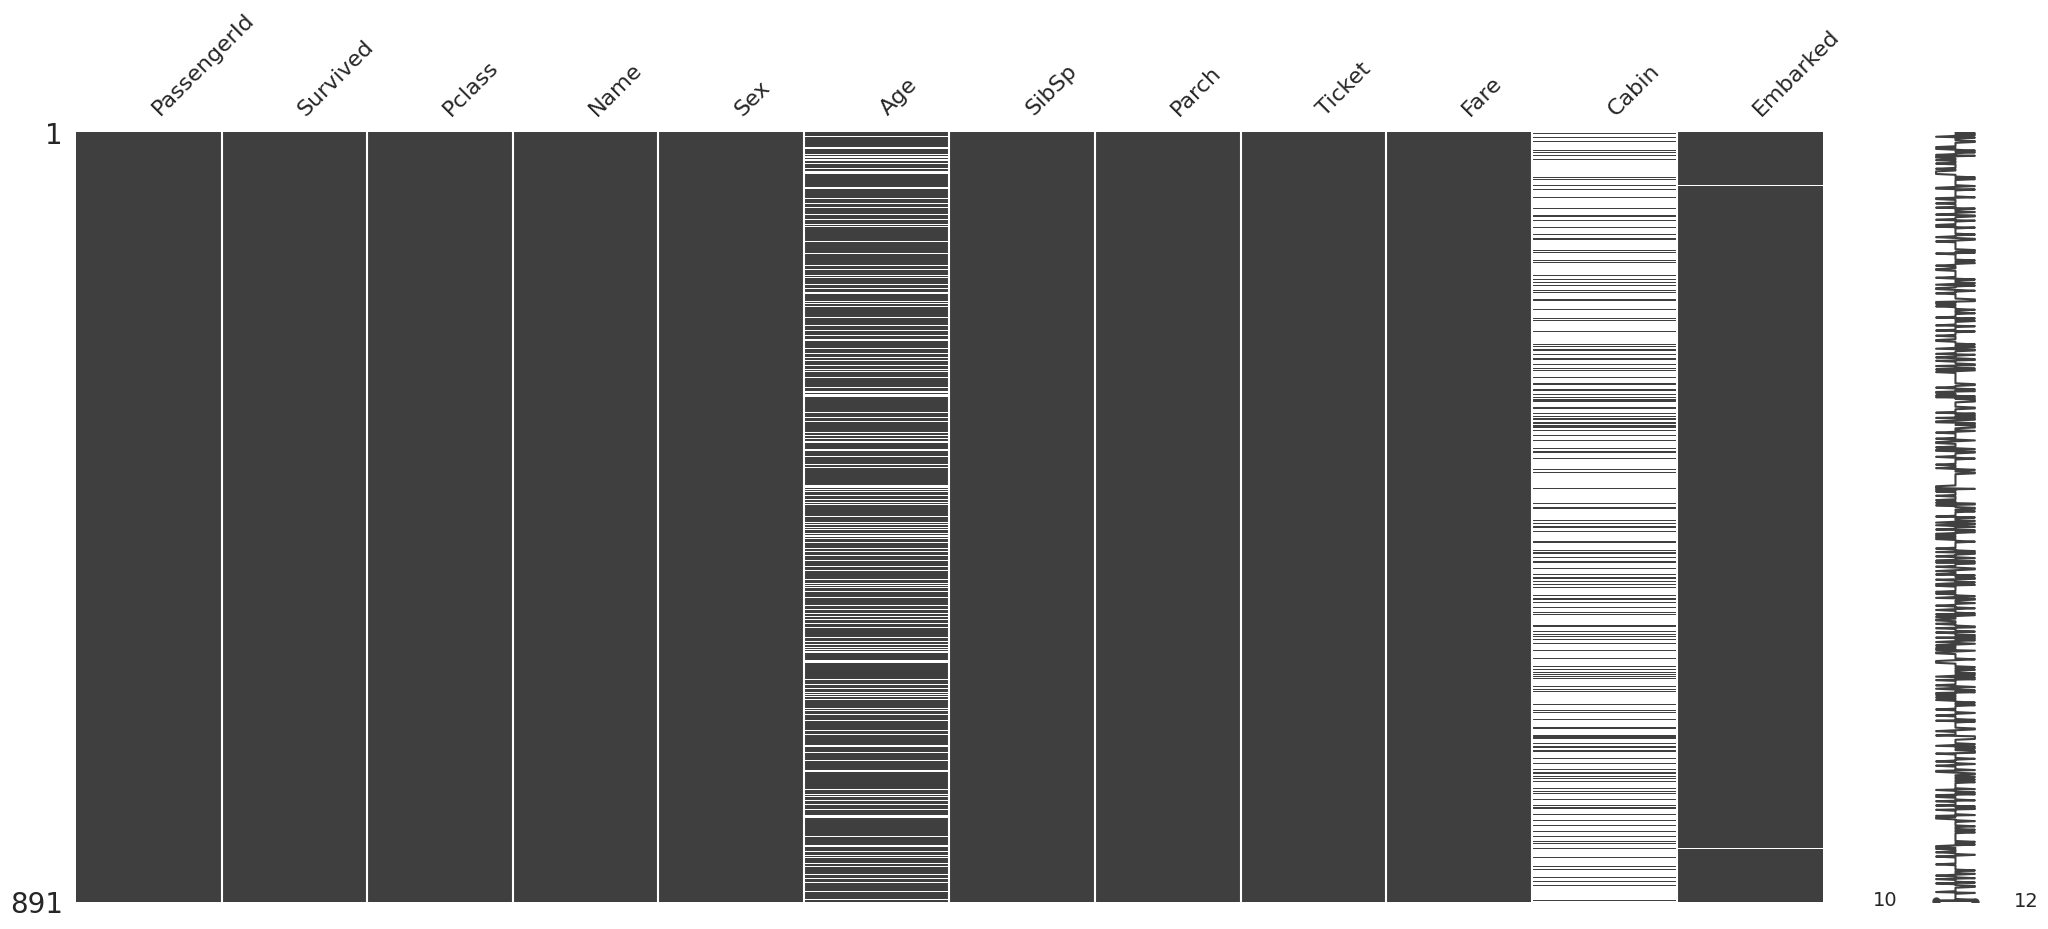

In [21]:
# !pip install missingno  # Uncomment if missingno is not installed
import missingno as msno

msno.matrix(train_data)
plt.show()


In [22]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


In [23]:
train_data['IsAlone'] = 1  # Initialize to 1 (Alone)
train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0  # Not alone


/tmp/ipykernel_16896/2731839319.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0  # Not alone
/tmp/ipykernel_16896/2731839319.py:2: SettingWithCopyWarning: 
A value is trying to 

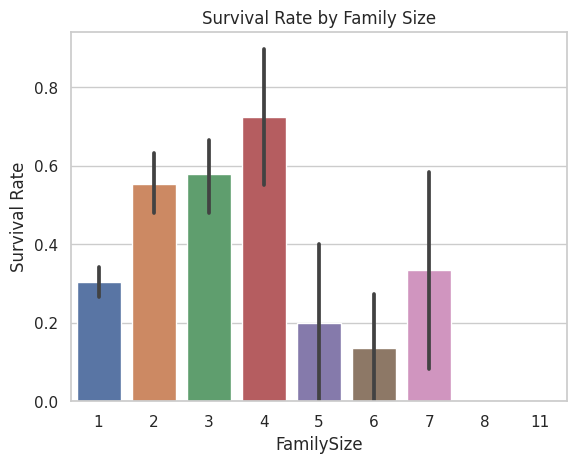

In [24]:
# Survival Rate by Family Size
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()
